 # Lecture 3: The Beta-Binomial Bayesian Model  
 
 ## Instructor: Dr. Hu Chuan-Peng  


 ## Part 1: Beta 先验

**“连任”**  

纣王很想知道自己的支持率，于是他让姬发现在质子团中组织一次民意调查。

![Image Name](https://cdn.kesci.com/upload/s141bvd2cb.PNG?imageView2/0/w/960/h/960)  

在此前，类似的支持率调查已经进行过很多次，根据历史记录：

- 纣王的支持率最低是35%，最高是55%，而平均支持率则在45%徘徊。

### 连续变量的先验模型

**“支持率$\pi$”**  

> 在上一节课，我们将Kasparov的胜率定义为$\pi$，$\pi$的取值被简化为0.2，0.5，0.8，且每个胜率对应一个可能性取值(如，胜率为0.8的可能性为0.65)。这是离散先验的概率模型,(见图3.1左侧)。  

对于任意一次民意调查，纣王的支持率都是未知的，$\pi$可以取0-1之间的任何值。

- 过去的选举情况为支持率提供了先验信息，因此我们可以为$\pi$建立一个连续先验的概率模型(continuous prior probability)


In [18]:
# 导入所需库
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import beta
import numpy as np

# 创建离散先验分布数据
prior_disc = [0.2, 0.5, 0.8]         # 离散先验分布的取值
prior_dis_prob = [0.10, 0.25, 0.65]  # 对应的概率
prior_disc_data = pd.DataFrame({'$\pi$': prior_disc, '$f(\pi)$': prior_dis_prob})

# 将'$\pi$'列的数据类型转换为字符串，以便在图表中正确显示
prior_disc_data['$\pi$'] = prior_disc_data['$\pi$'].astype('str')

# 定义计算 Beta 分布概率密度函数的函数
def calculate_beta_pdf(x):
    # 在这里示范了一个 Beta 分布的参数，你可以根据需要修改这些参数
    a = 9
    b = 11
    return beta.pdf(x, a, b)

# 生成横坐标数据，创建连续先验分布数据
x = np.linspace(0, 1, 10000)         # 横坐标范围为 [0,1] 之间的 10000 个数
prior_conti_data = pd.DataFrame({'$\pi$': x})

# 计算每个横坐标点对应的 Beta 分布概率密度
prior_conti_data['$f(\pi)$'] = prior_conti_data['$\pi$'].apply(calculate_beta_pdf)

# 打印生成的连续先验分布数据
print(prior_conti_data)


       $\pi$      $f(\pi)$
0     0.0000  0.000000e+00
1     0.0001  8.312356e-27
2     0.0002  2.125836e-24
3     0.0003  5.442837e-23
4     0.0004  5.431262e-22
...      ...           ...
9995  0.9996  8.698716e-29
9996  0.9997  4.902475e-30
9997  0.9998  8.508448e-32
9998  0.9999  8.315682e-35
9999  1.0000  0.000000e+00

[10000 rows x 2 columns]


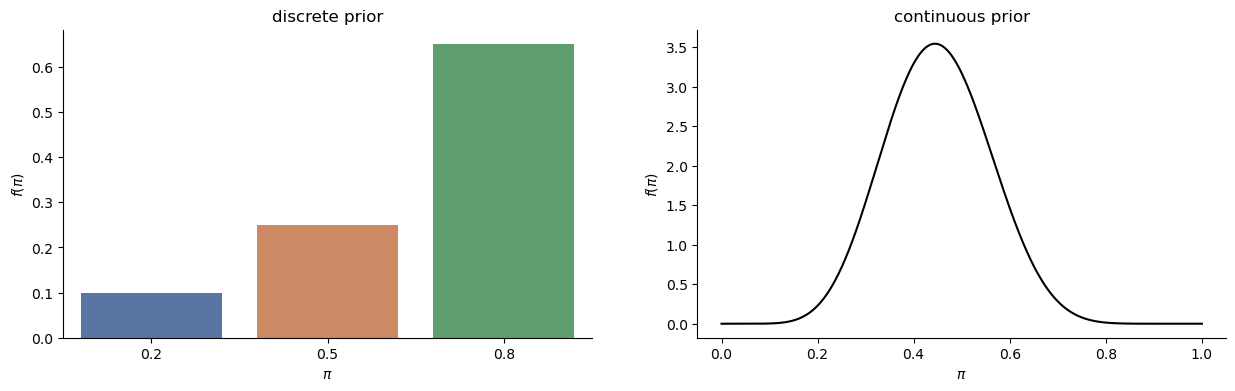

In [21]:
# 创建一个包含两个子图的图表
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))

# 在第一个子图中绘制离散先验分布的条形图
sns.barplot(data=prior_disc_data, x='$\pi$', y='$f(\pi)$', palette="deep", ax=ax1)

# 设置第一个子图的标题
ax1.set_title("discrete prior")

# 在第二个子图中绘制连续先验分布的线图
sns.lineplot(data=prior_conti_data, x="$\pi$", y="$f(\pi)$", color="black", ax=ax2)

# 设置第二个子图的标题
ax2.set_title("continuous prior")

# 移除图的上边框和右边框
sns.despine()



### Beta 先验模型

**continuous probability models**  

> 在上节课的例子中，$\pi$是离散型随机变量$Y$，可以通过概率质量密度函数(probability mass function, pmf)来描述离散型随机变量在各特定取值上的概率，对所有$\pi$的取值来说，$0\leq \pi \leq 1$， 并且 $\sum_{all\,\pmb{y}}f(\pi) = 1$，$\pi$取值的所有概率之和为1。

当$\pi$是一个连续的随机变量时，它服从于一个分布$f(\pi)$, 又被称为概率密度函数(probability density function, pdf)  

（1）pdf 与 pmf 有类似的性质：  

- $f(\pi) \ge 0$  
- $\int_\pi f(\pi)d\pi = 1, f(\pi)曲线下的面积之和为1$  
- 当$a \le b$时，$P(a < \pi < b) = \int_a^b f(\pi) d\pi$  


![Image Name](https://cdn.kesci.com/upload/s0ywgsar31.jpg?imageView2/0/w/500/h/500)  
> source:https://www.zhihu.com/question/263467674/answer/1117758894

**为$\pi$ 选择一个合适的分布-- Beta分布**  

虽然我们潜意识里可能认为 $\pi$ 服从正太分布 (如同之前的图表示那样)，然而，在统计世界中存在着许多分布。

在这里，我们假设纣王的支持率$\pi$服从Beta分布。  

- 其中，Beta分布要求$\pi$的取值范围满足[0,1]，
- 此外，Beta分布通过两个超参数(hyperparameters)，$\alpha \; (\alpha>0)\;和 \beta\;(\beta>0)$ 调节分布的形态。 

$$  
\pi \sim \text{Beta}(\alpha, \beta).  
$$  


**Beta分布的基础介绍**  

**控制分布形状—— $\alpha$和$\beta$**  

可视化网站：https://www.omnicalculator.com/statistics/beta-distribution#examples-of-beta-distribution-graphs  

调整$\alpha$和$\beta$的大小，观察分布形状的变化  

下图展示了不同$\alpha$和$\beta$下pdf形态的变化，实线代表均值，虚线代表众数  

![imageName](https://www.bayesrulesbook.com/bookdown_files/figure-html/beta-tuning-1.png)  
-------------------------------

**Beta分布的概率密度函数pdf**  

$$  
f(\pi) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)} \pi^{\alpha-1} (1-\pi)^{\beta-1} \;\;  for\; \pi \in [0,1] \  
$$  

*简单了解：*

* *$\Gamma$与阶乘有关*

* *$\Gamma(z) = \int_0^\infty x^{z-1}e^{-y}dx$ 且 $\Gamma(z + 1) = z \Gamma(z)$*  

* *当z是正整数的时候，$\Gamma(z)$ 可以被简化为$\Gamma(z) = (z-1)!$*

**调整Beta先验**  

在这里我们选择$\pi \sim \text{Beta}(45,55)$作为合理的先验模型

* *关于为何$\alpha=45, \beta=55$，感兴趣的同学可自行查看课后bonus*

带入公式，可以计算出先验$f(\pi)$的pdf：  

- pdf:  
$$
f(\pi) = \frac{\Gamma(100)}{\Gamma(45)\Gamma(55)}\pi^{44}(1-\pi)^{54} \;\; \text{ for } \pi \in [0,1]  .  
$$  


## Part 2 Binomial 与似然 

### 二项数据模型&似然函数


确定先验之后，第二步，姬发要开始收集数据，构建似然函数  

现在姬发在一个50人的质子群里发起了一场投票。

假设其中支持纣王的人数为$Y$，我们知道，如果支持率$\pi$越大，支持数$Y$也会更多。我们对选举结果做出如下假设：  

1. 每个投票者的结果都是互不影响的(质子A的选择不会影响质子B的选择)  

2. 任何一个质子支持纣王的可能性都为$\pi$  


我们已经知道，在这两个前提下，支持数$Y$与支持率$\pi$之间的关系符合二项分布：  
$$  
Y | \pi \sim \text{Bin}(50, \pi)  
$$  

在不同的支持率下，出现特定支持数的可能性$f(y|\pi)\quad y \in \{0,1,2,...,50\}$ 可以表示为：  
$$  
f(y|\pi) = P(Y=y | \pi) = \binom{50}{y} \pi^y (1-\pi)^{50-y}  
$$  

我们来进行一些具体的计算

假设纣王的支持率只有0.1，在这个前提下，50人进行投票，投票结果$Y \in ({1,2...50})$，而出现特定结果的概率可以表示为：
$$
f(Y=1|\pi=0.1) = \binom{50}{1} 0.1^1 (1-0.1)^{49}
$$
$$
f(Y=2|\pi=0.1) = \binom{50}{2} 0.1^2 (1-0.1)^{48}
$$
$$
...
$$
$$
f(Y=49|\pi=0.1) = \binom{50}{49} 0.1^{49} (1-0.1)^{1}
$$
$$
f(Y=50|\pi=0.1) = \binom{50}{50} 0.1^{50} (1-0.1)^{0}
$$

我们可以把这50个概率值画出来

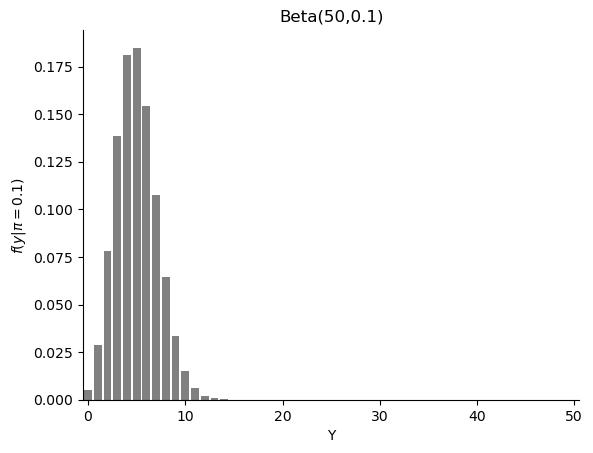

In [14]:
# 导入必要的库
from scipy.stats import binom
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 设置二项分布的参数
n = 50  # 总试验次数
p = 0.1  # 单次试验成功的概率

# 创建一个包含从0到50的整数的数组
k = np.arange(0, 51)

# 创建一个包含 'Y' 列的DataFrame
Y_data = pd.DataFrame({'Y': k})

# 计算每个 'Y' 对应的概率，并将结果存储在 'prob' 列中
Y_data['prob'] = Y_data['Y'].apply(lambda x: binom.pmf(x, n, p))

# 创建一个柱状图，表示概率分布
dist_pi_01 = sns.barplot(data=Y_data, x='Y', y='prob', color="grey")

# 设置图的标题
dist_pi_01.set_title("Beta(50,0.1)")

# 设置y轴标签
dist_pi_01.set(
    ylabel="$f(y|\\pi=0.1)$",       # 使用LaTeX标记设置y轴标签
    xticks=[0, 10, 20, 30, 40, 50]  # 设置x轴刻度
)

# 移除图的上边框和右边框
sns.despine()

**不同支持率下的投票数情况分布**

可以看到，当支持率$\pi$很低时，支持数$Y$集中在0-10之间。这很符合我们的直觉

同样的，我们可以查看不同支持率$\pi$下，支持数$Y$的分布情况
（注：这里只展示了当支持率$\pi$ =0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 九种情况下的分布图，但是记住$\pi$的取值其实是有无穷多个的）

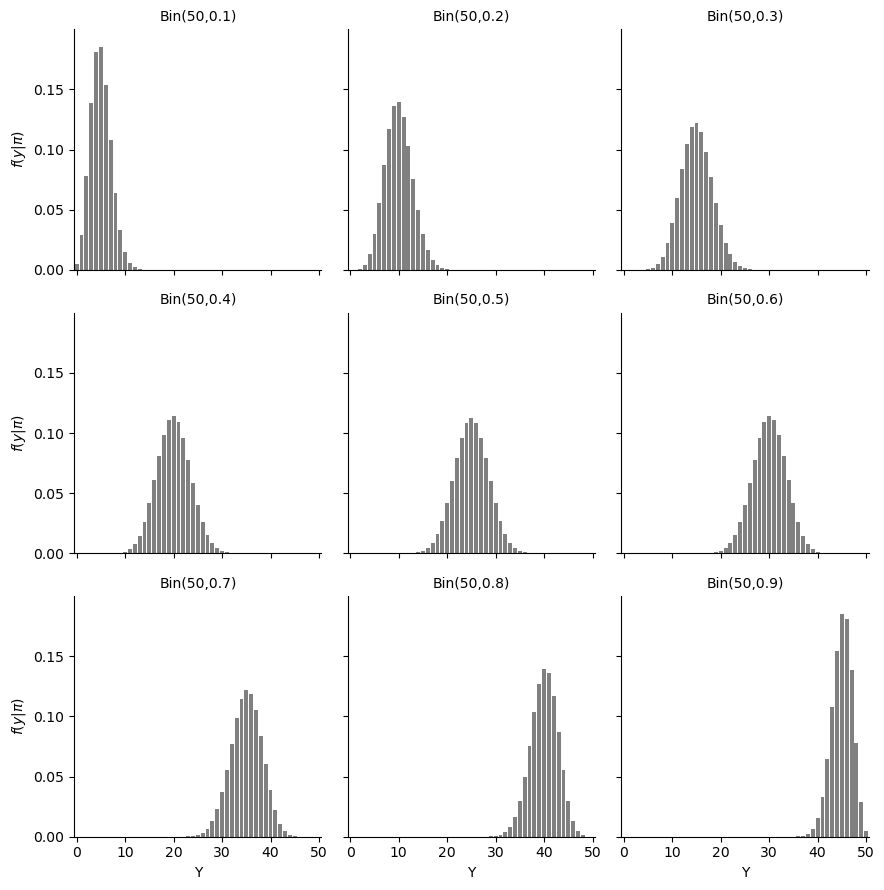

In [15]:
# 导入必要的库
import numpy as np
import pandas as pd
from scipy.stats import binom
import seaborn as sns
import matplotlib.pyplot as plt

# 设置二项分布的参数
n = 50  # 总试验次数
p_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]  # 不同的 p 值列表
k = np.arange(0, 51)                                      # 创建一个包含从0到50的整数的数组

# 创建一个包含 'Y' 列的 DataFrame
dist_all_pi = pd.DataFrame({'Y': k})

# 计算每个 'Y' 对应的概率，并将结果存储在相应列中
for p in p_values:
    column_name = f'{p}'
    dist_all_pi[column_name] = dist_all_pi['Y'].apply(lambda x: binom.pmf(x, n, p))

# 使用 stack() 和 reset_index() 转换数据为长格式
melted_data = dist_all_pi.set_index('Y').stack().reset_index()
melted_data.columns = ['Y', 'p', 'prob']

# 创建一个 FacetGrid 对象，用于绘制子图
plot_all_pi = sns.FacetGrid(melted_data, col='p', col_wrap=3)

# 使用柱状图绘制概率分布
plot_all_pi.map(sns.barplot, 'Y', 'prob', color="grey", order=None)

# 设置 x 和 y 轴的刻度和范围
plot_all_pi.set(xticks=[0, 10, 20, 30, 40, 50],
                yticks=[0.00, 0.05, 0.10, 0.15],
                ylim=(0, 0.20))

# 设置 y 轴标签
plot_all_pi.set_ylabels("$f(y|\\pi)$")

# 设置子图的标题模板
plot_all_pi.set_titles(col_template="Bin(50,{col_name})")

# 显示x=30的点
# for ax in g.axes.flat:
#     ax.scatter(x=30, y=0, color='red', marker='o', s=60)
# g.show()


支持率高时，投票数高的情况更可能出现；支持率低时，更可能出现的是投票数低的情况，这很符合我们的直觉。  

我们可以关注各个支持率下，投票数$Y=30$发生的概率（下图黑点）

![image](https://www.bayesrulesbook.com/bookdown_files/figure-html/binoms-3-1.png)




**$Y=30$ 的似然函数**

把不同支持率下，$Y=30$发生的可能性用公式表示出来，写成：

$$
f(Y=30|\pi=0.1) = \binom{50}{30} 0.1^{30} (1-0.1)^{20}
$$
$$
f(Y=30|\pi=0.2) = \binom{50}{30} 0.2^{30} (1-0.2)^{20}
$$
$$
...
$$
$$
f(Y=30|\pi=0.8) = \binom{50}{30} 0.8^{30} (1-0.8)^{20}
$$
$$
f(Y=30|\pi=0.9) = \binom{50}{30} 0.9^{30} (1-0.9)^{20}
$$

> 注意和先前的 “特定$\pi$下，不同事件发生的概率” 做一个区分

将不同支持率$\pi \in (0~1)$下，$Y=30$发生的相对可能性组合在一起，就构成了一个似然函数:

$$  
L(\pi | y=30) = \binom{50}{30} \pi^{30} (1-\pi)^{20} \; \;  for \; \pi \in [0,1]  .  
$$  

------------------------

把上图中，黑点们代表的概率都提出来，组合到一起，就构成了$Y=30$下的概率密度函数
<center>  

![image](https://www.bayesrulesbook.com/bookdown_files/figure-html/likelihood-election-ch3-1.png)  

</center>  

从两幅图中，我们都可以发现，当$\pi=0.6$时，$L(\pi|y=30)$ 取到最大值。也就是说投票数为30这个情况最可能在当$\pi = 0.6$时出现  

### Beta 后验模型

当我们有了先验与似然两种信息，可以尝试进行推断后验：  

$$  
\begin{align*} 
Y | \pi & \sim \text{Bin}(50, \pi)  \\  
    \pi & \sim \text{Beta}(45, 55). \\  
\end{align*}    
$$  

<center>  

![imageName](https://www.bayesrulesbook.com/bookdown_files/figure-html/like-election-ch3-1.png)  

</center>  

* 注意，在这里，为了方便在视觉上对比先验和似然，似然函数被缩放为相加和为1

**思考🧐**  

哪一张图正确反映了$\pi$的后验模型？  


![imageName](https://www.bayesrulesbook.com/bookdown_files/figure-html/unnamed-chunk-105-1.png)

我们可以画出后验分布图：

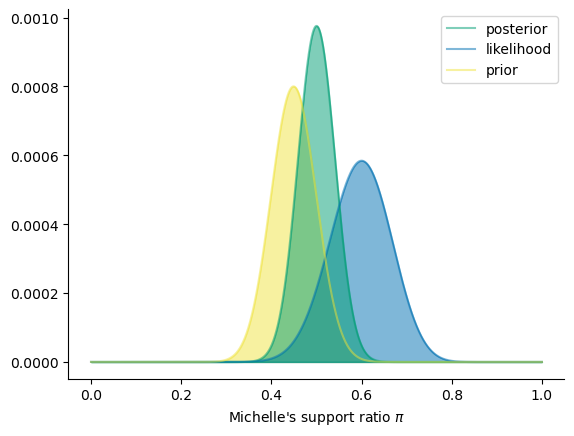

In [81]:
# 导入统计建模工具包 scipy.stats 为 st
import scipy.stats as st 

# 设置 x 轴范围 [0,1]
x = np.linspace(0,1,10000)
# 设置 Beta 分布参数
a,b = 45,55
# 形成先验分布 
prior = beta.pdf(x,a,b)/np.sum(beta.pdf(x,a,b))

# 形成似然
k = 30     # k 代表支持数
n = 50     # n 代表总投票数
likelihood = st.binom.pmf(k,n,x)

# 计算后验
unnorm_posterior = prior * likelihood                  # 计算分子
posterior = unnorm_posterior/np.sum(unnorm_posterior)  # 结合分母进行计算
likelihood = likelihood /np.sum(likelihood)            # 为了方便可视化，对似然进行类似后验的归一化操作 

# 绘图
plt.plot(x,posterior, color="#009e74", alpha=0.5, label="posterior")
plt.plot(x,likelihood, color="#0071b2", alpha=0.5, label="likelihood")
plt.plot(x,prior, color="#f0e442", alpha=0.5, label="prior")
plt.legend()
plt.xlabel("Michelle's support ratio $\pi$")
plt.fill_between(x, prior, color="#f0e442", alpha=0.5)
plt.fill_between(x, likelihood, color="#0071b2", alpha=0.5)
plt.fill_between(x, posterior, color="#009e74", alpha=0.5)
sns.despine()

**正式计算**  

$$  
f(\pi | y = 30) = \frac{f(\pi)L(\pi|y = 30)}{f(y = 30)}.  
$$  

和之前一样，分母$f(y = 30)$是一个常数，在计算中可以将其忽略  

$$  

f(\pi | y = 30) \propto f(\pi) L(\pi | y=30)  \\  
=\frac{\Gamma(100)}{\Gamma(45)\Gamma(55)}\pi^{44}(1-\pi)^{54} \cdot \binom{50}{30} \pi^{30} (1-\pi)^{20}\\  
= [\frac{\Gamma(100)}{\Gamma(45)\Gamma(55)}\binom{50}{30}]  \cdot \pi^{74} (1-\pi)^{74}  \\  
\propto \pi^{74} (1-\pi)^{74} \\  
\\  
[\;] 中的也是可以忽略的常数项 \\  

$$

整理一下可知，后验分布可以表示为：  
$$  
f(\pi | y=30) = c \pi^{74} (1-\pi)^{74} \propto \pi^{74} (1-\pi)^{74}  
$$  


根据这个公式，我们发现 $f(\pi | y=30)$ 和 $Beta(75,75)$ 有着相似的形状  

$$  
Beta(75,75) = \frac{\Gamma(150)}{\Gamma(75)\Gamma(75)}\pi^{74} (1-\pi)^{74}  
$$  

实际上，在这里后验分布也确实是Beta分布：  

$$  
\pi | (Y = 30) \sim \text{Beta}(75,75)  
$$

**对后验模型进行总结**  

在结合先验和似然之后，我们对支持率$\pi$的认识发生了更新。  

需要注意的是：后验模型仍然是一个$Beta$分布，和先验模型一样。  

$$  
\pi | (Y = 30) \sim \text{Beta}(75,75)  
$$  


$$  
f(\pi | y = 30) = \frac{\Gamma(150)}{\Gamma(75)\Gamma(75)}\pi^{74} (1-\pi)^{74}  
$$  

所以我们也可以对二者进行对比，下表进行了这一总结，可以发现，在新的数据产生之后：  

例如：  

- 对支持率的期望值从0.45增加为0.50；  

- 模型的标准差从0.0495减少为0.0407；  
	
|    |prior  |posterior  
|----|-----|----|  
|$\alpha$   |45  |75 |  
|$\beta$   |75  |75 |  
|mean   |0.45  |0.50 |  
|mode  |0.449  |0.500 |  
|var   |0.00245  |0.001656 |  
|sd   |0.04950  |0.04069 |  


**思考🧐**

- 先验分布的形态是否决定了后验分布的形态？(还记得之前关于正态分布和Beta分布的例子吗)
- 先验分布和后验分布是否必然一致？

### Part 3: Beta-Binomial model and simulation

**Beta-Binomial model 的一般数学形式**

在前一节中，我们为纣王的支持率$\pi$建立了基本的Beta-Binomial模型。

- 我们假设了一个特定的Beta(45,55)先验分布和特定的民意调查结果（支持者： Y = 30，总人数： n = 50）。
- 这只是Beta-Binomial模型的一个特例。 实际上 Beta 模型可以适用于任何参数范围($\pi$)在[0,1]的场景。
- 例如，$\pi$可以表示硬币为正面的倾向，或者表示使用社交媒体的成年人比例。

$$
\begin{split}
Y | \pi & \sim \text{Bin}(n, \pi) \\
\pi & \sim \text{Beta}(\alpha, \beta). \\
\end{split}
$$


无论是哪种情况，在观察到 n 次时间中有 Y = y次目标事件后，$\pi$的后验分布可以用Beta模型来描述，反映了先验（通过α和β）和数据（通过y和n）的影响：

$$
\begin{equation}
\pi | (Y = y) \sim \text{Beta}(\alpha + y, \beta + n - y)  .
\tag{3.10}
\end{equation}
$$


需要注意的是，后验与先验是相同的概率模型，只是参数不同

- 在这个例子中，Beta(α, β)模型是对应数据模型的 $\text{Bin}(n, \pi)$ 的**共轭先验 (conjugate prior)**。
- 如果 f($\pi$)是L($\pi$∣y)的共轭先验，后验f($\pi$∣y) ∝ f($\pi$)L($\pi$∣y)与先验来自相同的模型族。
- 我们将在第五次课详细介绍共轭先验的相关知识。


**代码实现**

让我们模拟纣王的支持率π的后验模型。

- 首先，我们从Beta(45,55)先验中模拟10,000个π值，
- 然后, 使用从每个π值中模拟Bin(50,π)的潜在调查结果Y：

模拟结果：10,000对π和y值


In [1]:
# 导入数据加载和处理包：pandas
import pandas as pd
# 导入数字和向量处理包：numpy
import numpy as np
# 导入基本绘图工具：matplotlib
import matplotlib.pyplot as plt

# 设置随机种子，以便后续可以重复结果
np.random.seed(84735)
# 模拟 10000 次数据
king_sim = pd.DataFrame({'pi': np.random.beta(45, 55, size=10000)})  # 从Beta(45,55)先验中模拟10,000个π值
king_sim['y'] = np.random.binomial(n=50, p=king_sim['pi'])       # 从每个π值中模拟Bin(50,π)的潜在调查结果Y

# 显示部分数据
king_sim.head()

,pi,y
0,0.479492,28
1,0.385205,16
2,0.412269,19
3,0.458158,20
4,0.397845,24


通过散点图观察以上数据的关系:
- 黑色点表示支持数Y!=30的部分。
- 蓝色点表示支持数Y=30的部分。

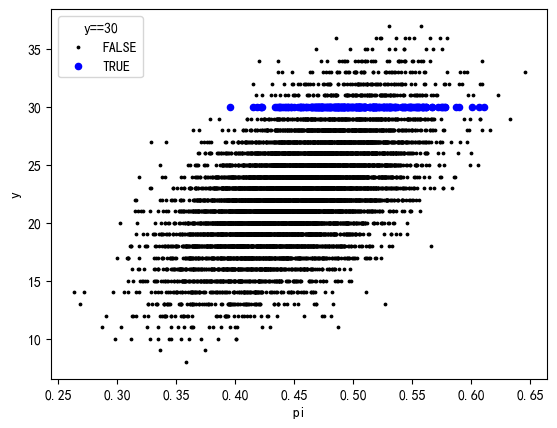

In [18]:
# 绘制散点图：非调查结果 (Y!=30)部分，用黑色表示
plt.scatter(king_sim['pi'][king_sim['y']!=30], 
            king_sim['y'][king_sim['y']!=30], 
            c='black', s = 3,
            label='FALSE')
# 绘制散点图：调查结果 (Y=30)部分，用蓝色表示
plt.scatter(king_sim['pi'][king_sim['y']==30],
            king_sim['y'][king_sim['y']==30],
            c='b', s = 20, 
            label='TRUE')

# 显示图片
plt.legend(title = "y==30")
plt.xlabel('$\pi$')
plt.ylabel('Y')
plt.show()

当我们仅关注与我们的Y = 30调查结果匹配的对时，剩下的π值的很好地逼近了后验模型Beta(75,75)：

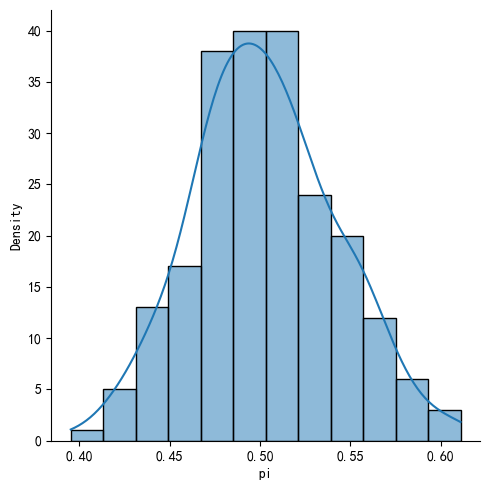

In [26]:
# 导入高级绘图工具 seaborn 为 sns
import seaborn as sns

king_posterior = king_sim[king_sim['y'] == 30]

# 绘制分布图：概率密度+柱状图
sns.displot(king_posterior['pi'], kde=True)
plt.xlabel('$\pi$')
plt.ylabel('Density')
plt.show()

同时绘制出先验、似然和后验。

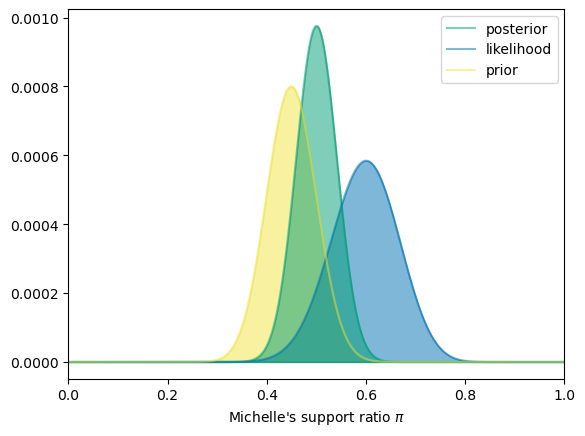

In [82]:
# 导入统计建模工具包 scipy.stats 为 st
import scipy.stats as st 

# 设置 x 轴范围 [0,1]
x = np.linspace(0,1,10000)
# 设置 Beta 分布参数
a,b = 45,55
# 形成先验分布 
prior = beta.pdf(x,a,b)/np.sum(beta.pdf(x,a,b))

# 形成似然
k = 30                  # k 代表支持数
n = 50                  # n 代表总投票数
likelihood = st.binom.pmf(k,n,x)

# 计算后验
unnorm_posterior = prior * likelihood                  # 计算分子
posterior = unnorm_posterior/np.sum(unnorm_posterior)  # 结合分母进行计算
likelihood = likelihood /np.sum(likelihood)            # 为了方便可视化，对似然进行类似后验的归一化操作 

# 绘图
plt.plot(x,posterior, color="#009e74", alpha=0.5, label="posterior")
plt.plot(x,likelihood, color="#0071b2", alpha=0.5, label="likelihood")
plt.plot(x,prior, color="#f0e442", alpha=0.5, label="prior")
plt.legend()
plt.xlabel("king's support ratio $\pi$")
plt.fill_between(x, prior, color="#f0e442", alpha=0.5)
plt.fill_between(x, likelihood, color="#0071b2", alpha=0.5)
plt.fill_between(x, posterior, color="#009e74", alpha=0.5)
plt.xlim([0,1])
plt.show()

我们还可以使用模拟样本近似后验特征，例如Michelle支持率的均值和标准差。

- 结果与上面计算的理论值非常相似，E(π∣Y = 30) = 0.5和SD(π∣Y = 30) = 0.0407：
- 在解释这些模拟结果时，“近似”是一个关键词。由于我们10,000次模拟中只有219次与观测到的Y = 30数据匹配，通过将原始模拟次数从10,000增加到50,000，可以改善这个近似值：

In [29]:
print(
  "近似值：", 
  "均值，",
  king_posterior['pi'].mean(), 
  "。标准差，",
  king_posterior['pi'].std()
)

近似值： 均值， 0.5024772340319912 。标准差， 0.0394983348061003


In [34]:
print(f"10,000次模拟中, {king_posterior.shape[0]}次与观测到的Y = 30数据匹配")

# 模拟新的数据
size = 50000 # 不同于之前的 10000
king_sim2 = pd.DataFrame({'pi': np.random.beta(45, 55, size=size)})
king_sim2['y'] = np.random.binomial(n=50, p=king_sim2['pi'])
king_posterior2 = king_sim2[king_sim2['y'] == 30]
print(f"50,000次模拟中, {king_posterior2.shape[0]}次与观测到的Y = 30数据匹配")

10,000次模拟中, 219次与观测到的Y = 30数据匹配
50,000次模拟中, 1045次与观测到的Y = 30数据匹配


### 🎈总结 

在第3章中，我们学习了构建了Beta-binomial二项式模型,用于描述取值范围在0到1之间的比例π:

$$
\begin{split}
Y | \pi &\sim \text{Bin}(n, \pi) \\  
\pi &\sim \text{Beta}(\alpha, \beta)
\end{split}
\Rightarrow \pi | (Y = y) \sim \text{Beta}(\alpha + y, \beta + n - y).
$$

这个模型反映了贝叶斯分析的四个通用要素:

1. 先验模型 Beta先验模型可以通过调节参数来反映不同的π值在[0,1]范围内的相对先验可能性。

$$
f(\pi) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)}\pi^{\alpha - 1}(1-\pi)^{\beta - 1}.
$$

2. 数据模型 为了学习π,我们收集数据Y,即n次独立试验中成功的次数,其中每次试验成功的概率为π。Y对π的依赖关系由二项分布Bin(n, π)总结。

3. 似然函数 在观测到数据Y=y,其中y∈{0,1,...,n}后,π的似然函数通过将y代入二项式概率质量函数而获得,它提供了一种机制来比较不同π与数据的兼容性:

$$
L(\pi|y) = \binom{n}{y}\pi^y(1-\pi)^{n-y} \text{ for } \pi \in [0,1].
$$

4. 后验模型 通过贝叶斯规则,共轭的Beta先验和二项式数据模型结合产生π的Beta后验模型。更新的Beta后验参数(α + y,β + n - y)反映了先验的影响(通过α和β)和观测数据的影响(通过y和n)。

$$
f(\pi|y) \propto f(\pi)L(\pi|y) \propto \pi^{(\alpha+y)-1}(1-\pi)^{(\beta+n-y)-1}.
$$

**🥋练习**

- 假设虚假新闻出现的概率为 0.4 ($\pi$ = 0.4)， 请自行选择一个合适的 Beta 分布，模拟10000个$\pi$值。
- 请根据 $\pi$ 模拟相应的数据 Y (虚假新闻的数量)，假设总的新闻数量 n = 100。
- 绘制先验分布和后验分布的图像。


其中设计的python基础操作请参考：

![Image Name](https://cdn.kesci.com/upload/s0vfx2ld9v.png?imageView2/0/w/1280/h/1280)

### Bonus 1：Beta(45,55)这个先验是怎么选取的?

**Beta分布的集中趋势量数**

在回答这个问题之前，我们先来了解一下**Beta分布的集中趋势量数**  

需要注意的是，虽然我们可能比较熟悉计算正态分布的均值、众数和标准差；但 Beta 分布的相关统计量的计算有所不同：

![Image Name](https://cdn.kesci.com/upload/s0ywp66o5v.png?imageView2/0/w/500/h/500)  
>source:https://en.wikipedia.org/wiki/Probability_density_function

**1. 平均数(mean)**  

- $\pi$的平均取值  
$$  
E(\pi)  = \frac{\alpha}{\alpha + \beta}  
$$  
$$  
E(\pi) = \int \pi \cdot f(\pi)d\pi.  
$$  

**2. 众数(mode)**  

- $\pi$最可能的取值。即，在$\pi$下，$f(\pi)$能取到最大值。  

$$  
\text{Mode}(\pi)  = \frac{\alpha - 1}{\alpha + \beta - 2} \;\;\; \text{ when } \; \alpha, \beta > 1.  
$$  
$$  
\text{Mode}(\pi) = \text{argmax}_\pi f(\pi).  
$$  
**3. 方差(variance)**  

- $\pi$取值的可变性(variability)  
$$  
\text{Var}(\pi) = E((\pi - E(\pi))^2) = \int (\pi - E(\pi))^2 \cdot f(\pi) d\pi.  
$$  

$$  
\text{Var}(\pi) = \frac{\alpha \beta}{(\alpha + \beta)^2(\alpha + \beta + 1)} .  
$$  

**4. 标准差(standard deviation)**  
$$  
\text{SD}(\pi) := \sqrt{\text{Var}(\pi)} .  
$$

**调整Beta先验**  

我们已经知道，Michelle的平均支持率为45%。我们可以根据这一点来计算beta分布的$\alpha$和$\beta$。  
$$  
E(\pi) = \alpha/(\alpha + \beta) \approx 0.45  
$$  
重新整理过后：  
$$  
\alpha \approx \frac{9}{11} \beta  
$$  
一个合适的分布中，$\alpha$和$\beta$需要满足的条件如上，我们可以选择 *Beta(9,11), Beta(27,33), Beta(45,55)*，我们可以通过以下代码来画出这些分布的形状

In [ ]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

x = np.linspace(0,1,10000)
y1 = beta.pdf(x,9,11)
y2 = beta.pdf(x,27,33)
y3 = beta.pdf(x,45,55)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].plot(x,y1)
axes[0].set_title("Beta(9,11)")
axes[1].plot(x,y2)
axes[1].set_title("Beta(27,33)")
axes[2].plot(x,y3)
axes[2].set_title("Beta(45,55)")

Text(0.5, 1.0, 'beta(45,55)')

<Figure size 1080x360 with 3 Axes>

如图所示，我们选择$\pi \sim \text{Beta}(45,55)$作为合理的先验模型  

带入公式，可以计算出$先验f(\pi)$的pdf、平均数、众数、方差和标准差：  

- pdf:  
$$  
f(\pi) = \frac{\Gamma(100)}{\Gamma(45)\Gamma(55)}\pi^{44}(1-\pi)^{54} \;\; \text{ for } \pi \in [0,1]  .  
$$  

- 平均数:  
$$  
E(\pi) = \frac{45}{45 + 55} = 0.4500  
$$  

- 众数:  
$$  
\text{Mode}(\pi) = \frac{45 - 1}{45 + 55 - 2} = 0.4490  
$$  

- 方差:  
$$  
\text{Var}(\pi)  = \frac{45 \cdot 55}{(45 + 55)^2(45 + 55 + 1)} = 0.0025  
$$  

- 标准差：  
$$  
\text{SD}(\pi)   = \sqrt{0.0025} = 0.05.  
$$  





### Bonus2 Beta-Binomial 模型生成的后验仍是Beta分布

**公式推导**

对于 $\pi$ 的后验模型为 $Beta(α + y, β + n − y)$ 的推导过程 (其中，支持者为y，总人数为n)。

1. 首先写出先验的公式

$$
\begin{equation}
f(\pi) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)}\pi^{\alpha - 1}(1-\pi)^{\beta - 1} 
\;\; \text{ and } \;\; 
L(\pi|y) = \left(\!\!\begin{array}{c} n \\ y\end{array}\!\!\right) \pi^{y} (1-\pi)^{n-y}  .
\tag{3.12}
\end{equation}
$$

2. 结合先验和似然函数 (暂时忽略分母)，后验概率密度函数可以由贝叶斯定理得到：

$$
\begin{split}
f(\pi | y)
& \propto f(\pi)L(\pi|y) \\
& = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)}\pi^{\alpha - 1}(1-\pi)^{\beta - 1}  \cdot \left(\!\begin{array}{c} n \\ y \end{array}\!\right) \pi^{y} (1-\pi)^{n-y} \\
& \propto \pi^{(\alpha + y) - 1} (1-\pi)^{(\beta + n - y) - 1}  .\\
\end{split}
$$

3. 最后，我们加上归一化因子(分母部分)：

$$
f(\pi|y) = \frac{\Gamma(\alpha+\beta+n)}{\Gamma(\alpha+y)\Gamma(\beta+n-y)}\pi^{(\alpha + y) - 1} (1-\pi)^{(\beta + n - y) - 1}.
$$

------------------

我们知道$Beta(a,b)$的概率密度函数可以写为：
$$  
Beta(α, β) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)} \pi^{\alpha-1} (1-\pi)^{\beta-1} \;\;  for\; \pi \in [0,1] \  
$$  

因此，

$$

f(\pi|y) = Beta(α + y, β + n − y)

$$